<a href="https://colab.research.google.com/github/clare-abreu/SCIP/blob/main/SCIP_bootstrapping_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome back to the bootstrapping tutorial! I hope you enjoyed trying out the coding problem.

To see the solutions, let's first run the original code again. I put it all into a single block so it's easy to run:

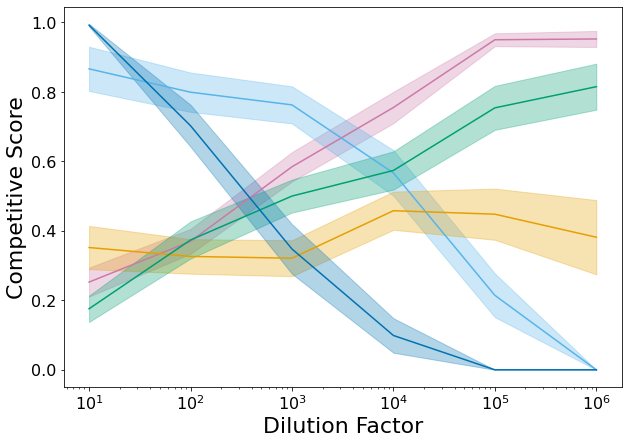

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import choices

SMALL_SIZE = 16
BIGGER_SIZE = 22
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels

url ='https://raw.githubusercontent.com/clare-abreu/SCIP/main/experimental_data.csv'
df = pd.read_csv(url)

dilution_factors = [10,100,1000,10000,100000,1000000]   # There are six dilution factors
comp_scores = np.zeros([5,6])   # This is an array of competitive scores of each species (five rows) at each dilution factor (six columns).
comp_means = np.zeros([5,6])    # This is a similar array, but instead of the mean score, it will contain the mean bootstrapped score.
comp_SEMs = np.zeros([5,6])     # This array will contain the standard errors of the competitive scores, which is equal to the standard deviations of the bootstrap means.

num_trials=1000   # Number of bootstrap trials
for d in range(len(dilution_factors)):    # Loop over dilution factors
    this_dil = dilution_factors[d]
    df_dil = df[df['DilutionFactor']==this_dil]   # Find all data from this dilution factor
    for k in range(1,6):                  # Loop over species
        this_species_dfA = df_dil[df_dil['SpeciesA']==k]  # Find all data for this species when it is in the "SpeciesA" column
        this_species_dfB = df_dil[df_dil['SpeciesB']==k]  # Find all data for this species when it is in the "SpeciesB" column
        this_species_this_dil = this_species_dfA['Afraction'].tolist() + this_species_dfB['Bfraction'].tolist() # Make a list of all final fractions for this species in this dilution factor
        comp_scores[k-1,d] = np.mean(this_species_this_dil) # Calculate this species' competitive score in this dilution factor (note: this is not the same as the bootstrap mean)
        num_samples = len(this_species_this_dil)          # Determine the sample size so that we can make this the bootstrap sample size
        
        #Bootstrap:
        bootstrap_means = []    # Make an empty list to store bootstrap means for each trial
        for j in range(num_trials):   # Loop over all bootstrap trials
            # The "choices" function below does most of the work of bootstrapping-- it samples randomly from the dataset, with replacement, to form a new dataset
            this_sample = choices(this_species_this_dil, k=num_samples)   
            bootstrap_means.append(np.mean(this_sample))  # Find the mean competitive score for this trial (note: this is probably different for each trial, and from the mean calculated above)
        comp_means[k-1,d] = np.mean(bootstrap_means)    # Find the mean competitive score of all bootstrap trials
        comp_SEMs[k-1,d] = np.std(bootstrap_means)      # Find the standard deviation of all bootstrap trials, which is equivalent to the standard error of the mean


# Plot the data:

colors = ['#CC79A7','#56B4E9','#E69F00','#009E73','#0072B2']    # These colors correspond to the five species

plt.figure(figsize=(10,7))
for k in range(5):    # Loop over species
    plt.plot(dilution_factors,comp_means[k,:], color=colors[k])   # Plot the bootstrap means of this species over all dilution factors
    plt.fill_between(dilution_factors,comp_means[k,:]-comp_SEMs[k,:], comp_means[k,:]+comp_SEMs[k,:],alpha=0.3, edgecolor=colors[k], facecolor=colors[k]) # Plot the error bars using the standard deviations of the bootstrap trials
plt.ylabel('Competitive Score')
plt.xlabel('Dilution Factor')
plt.xscale("log")
plt.show()  
    

# **Question Solutions**:

  1. Why are some of the error bars equal to zero (for example, the dark blue species at the lowest dilution factor)?

*Error bars are equal to zero if all of the data points are equal. In this case, bootstrapping won't generate variation around the mean, since it will sample the same value every time. For example, the dark blue species outcompeted all other species at the lowest dilution factor (with very few exceptions), resulting in a competitive score of about one (with very little variation). Similarly, it went extinct in all competitions at the highest two dilution factors, resulting in a competitive score of zero.*


  2. Compare the actual competitive scores (comp_scores) to the mean bootstrap competitive scores (comp_means). Are they similar?

*We can load both arrays to compare them:*

In [9]:
print(comp_scores)
print(comp_means)

[[0.25294343 0.37078777 0.58304845 0.7548818  0.94907718 0.95237212]
 [0.86637681 0.80150133 0.76191624 0.5663112  0.21368246 0.        ]
 [0.35382265 0.33021691 0.32491514 0.45794452 0.44925671 0.38095238]
 [0.17790301 0.37348732 0.49772557 0.57388826 0.75523069 0.81658568]
 [0.99221394 0.70504776 0.3505539  0.09674548 0.         0.        ]]
[[0.25258552 0.36977021 0.58451612 0.75526743 0.95027762 0.95256207]
 [0.86647304 0.79926816 0.76275374 0.56677186 0.2143711  0.        ]
 [0.35207469 0.32639761 0.32128865 0.45810106 0.44803334 0.38171429]
 [0.17578664 0.37381193 0.50022089 0.57398573 0.75425895 0.81516509]
 [0.99237117 0.70280071 0.34779966 0.09881459 0.         0.        ]]


*The two arrays are very similar. Although the bootstrap means aren't the same as the actual means, performing enough bootstrap trials will make them indistinguishable.*


  3. This experiment showed that increasing dilution favors faster-growing species. Which do you think are the fastest-growing species?

*The pink and green species are the fastest-growing. An interesting result in this experiment was also that the slowest-growing species (dark blue, light blue) performed best at low dilution factors, indicating a trade-off between growth rate and competitive ability.*

# **Coding Problem Solution**:

Change the code above to re-do the bootstrap with a sample size set to 3 (instead of the actual sample size). How does this change the width of the error bars? And how does it change the similarity between the actual competitive scores and the mean bootstrap competitive scores?

*Below, I've changed the boostrap sample size to 3:*

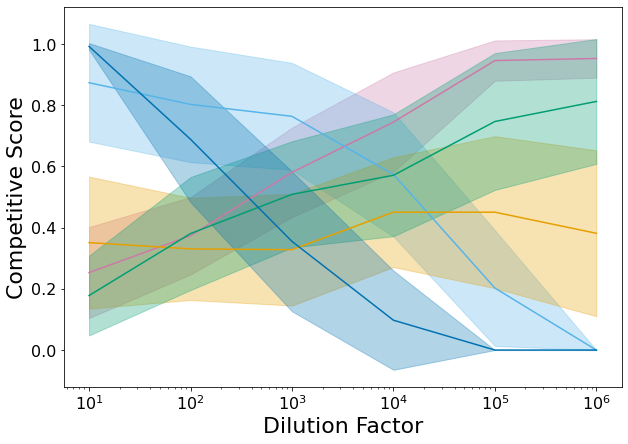

In [10]:
num_trials=1000   # Number of bootstrap trials
for d in range(len(dilution_factors)):    # Loop over dilution factors
    this_dil = dilution_factors[d]
    df_dil = df[df['DilutionFactor']==this_dil]   # Find all data from this dilution factor
    for k in range(1,6):                  # Loop over species
        this_species_dfA = df_dil[df_dil['SpeciesA']==k]  # Find all data for this species when it is in the "SpeciesA" column
        this_species_dfB = df_dil[df_dil['SpeciesB']==k]  # Find all data for this species when it is in the "SpeciesB" column
        this_species_this_dil = this_species_dfA['Afraction'].tolist() + this_species_dfB['Bfraction'].tolist() # Make a list of all final fractions for this species in this dilution factor
        comp_scores[k-1,d] = np.mean(this_species_this_dil) # Calculate this species' competitive score in this dilution factor (note: this is not the same as the bootstrap mean)
        num_samples = len(this_species_this_dil)          # Determine the sample size so that we can make this the bootstrap sample size
        
        #Bootstrap:
        bootstrap_means = []    # Make an empty list to store bootstrap means for each trial
        for j in range(num_trials):   # Loop over all bootstrap trials
            # The "choices" function below does most of the work of bootstrapping-- it samples randomly from the dataset, with replacement, to form a new dataset
            
            # CODE CHANGED HERE:
            
            this_sample = choices(this_species_this_dil, k=3)#num_samples)   

            
            bootstrap_means.append(np.mean(this_sample))  # Find the mean competitive score for this trial (note: this is probably different for each trial, and from the mean calculated above)
        comp_means[k-1,d] = np.mean(bootstrap_means)    # Find the mean competitive score of all bootstrap trials
        comp_SEMs[k-1,d] = np.std(bootstrap_means)      # Find the standard deviation of all bootstrap trials, which is equivalent to the standard error of the mean


# Plot the data:

colors = ['#CC79A7','#56B4E9','#E69F00','#009E73','#0072B2']    # These colors correspond to the five species

plt.figure(figsize=(10,7))
for k in range(5):    # Loop over species
    plt.plot(dilution_factors,comp_means[k,:], color=colors[k])   # Plot the bootstrap means of this species over all dilution factors
    plt.fill_between(dilution_factors,comp_means[k,:]-comp_SEMs[k,:], comp_means[k,:]+comp_SEMs[k,:],alpha=0.3, edgecolor=colors[k], facecolor=colors[k]) # Plot the error bars using the standard deviations of the bootstrap trials
plt.ylabel('Competitive Score')
plt.xlabel('Dilution Factor')
plt.xscale("log")
plt.show()  
    

*The small sample size makes the error much bigger.*

*As for the similarity between bootstrap means and actual means, let's compare again:*

In [11]:
print(comp_scores)
print(comp_means)

[[0.25294343 0.37078777 0.58304845 0.7548818  0.94907718 0.95237212]
 [0.86637681 0.80150133 0.76191624 0.5663112  0.21368246 0.        ]
 [0.35382265 0.33021691 0.32491514 0.45794452 0.44925671 0.38095238]
 [0.17790301 0.37348732 0.49772557 0.57388826 0.75523069 0.81658568]
 [0.99221394 0.70504776 0.3505539  0.09674548 0.         0.        ]]
[[0.25330342 0.37363708 0.58079581 0.74501486 0.94611154 0.95301533]
 [0.87373043 0.80293533 0.76391186 0.57406534 0.20265166 0.        ]
 [0.35118361 0.33059285 0.32804322 0.45069622 0.45058988 0.38166667]
 [0.17819477 0.38074445 0.50888537 0.57119051 0.74698244 0.81260415]
 [0.99229895 0.68894114 0.35514617 0.09755729 0.         0.        ]]


*The bootstrap means are pretty accurate, even with a sample size of 3. This is because we are still averaging over 1000 trials. Let's try reducing the number of bootstrap trials to 10:*

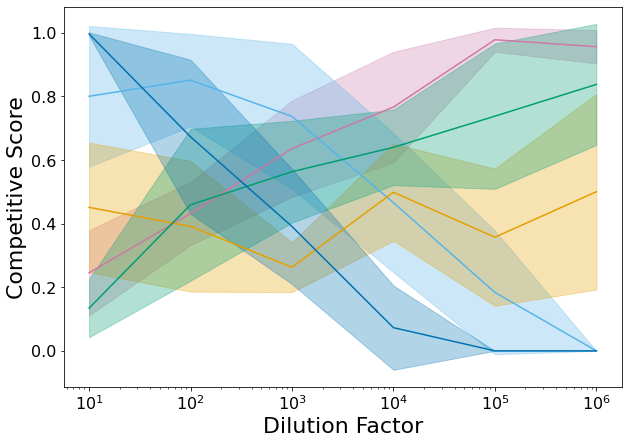

In [14]:
# CODE CHANGED HERE:

num_trials=10#00   # Number of bootstrap trials


for d in range(len(dilution_factors)):    # Loop over dilution factors
    this_dil = dilution_factors[d]
    df_dil = df[df['DilutionFactor']==this_dil]   # Find all data from this dilution factor
    for k in range(1,6):                  # Loop over species
        this_species_dfA = df_dil[df_dil['SpeciesA']==k]  # Find all data for this species when it is in the "SpeciesA" column
        this_species_dfB = df_dil[df_dil['SpeciesB']==k]  # Find all data for this species when it is in the "SpeciesB" column
        this_species_this_dil = this_species_dfA['Afraction'].tolist() + this_species_dfB['Bfraction'].tolist() # Make a list of all final fractions for this species in this dilution factor
        comp_scores[k-1,d] = np.mean(this_species_this_dil) # Calculate this species' competitive score in this dilution factor (note: this is not the same as the bootstrap mean)
        num_samples = len(this_species_this_dil)          # Determine the sample size so that we can make this the bootstrap sample size
        
        #Bootstrap:
        bootstrap_means = []    # Make an empty list to store bootstrap means for each trial
        for j in range(num_trials):   # Loop over all bootstrap trials
            # The "choices" function below does most of the work of bootstrapping-- it samples randomly from the dataset, with replacement, to form a new dataset
            
            # CODE CHANGED HERE:
            
            this_sample = choices(this_species_this_dil, k=3)#num_samples)   

            
            bootstrap_means.append(np.mean(this_sample))  # Find the mean competitive score for this trial (note: this is probably different for each trial, and from the mean calculated above)
        comp_means[k-1,d] = np.mean(bootstrap_means)    # Find the mean competitive score of all bootstrap trials
        comp_SEMs[k-1,d] = np.std(bootstrap_means)      # Find the standard deviation of all bootstrap trials, which is equivalent to the standard error of the mean


# Plot the data:

colors = ['#CC79A7','#56B4E9','#E69F00','#009E73','#0072B2']    # These colors correspond to the five species

plt.figure(figsize=(10,7))
for k in range(5):    # Loop over species
    plt.plot(dilution_factors,comp_means[k,:], color=colors[k])   # Plot the bootstrap means of this species over all dilution factors
    plt.fill_between(dilution_factors,comp_means[k,:]-comp_SEMs[k,:], comp_means[k,:]+comp_SEMs[k,:],alpha=0.3, edgecolor=colors[k], facecolor=colors[k]) # Plot the error bars using the standard deviations of the bootstrap trials
plt.ylabel('Competitive Score')
plt.xlabel('Dilution Factor')
plt.xscale("log")
plt.show()  
    

*Now, not only are the error bars big, but the lines have shifted. Let's compare the arrays:*

In [15]:
print(comp_scores)
print(comp_means)

[[0.25294343 0.37078777 0.58304845 0.7548818  0.94907718 0.95237212]
 [0.86637681 0.80150133 0.76191624 0.5663112  0.21368246 0.        ]
 [0.35382265 0.33021691 0.32491514 0.45794452 0.44925671 0.38095238]
 [0.17790301 0.37348732 0.49772557 0.57388826 0.75523069 0.81658568]
 [0.99221394 0.70504776 0.3505539  0.09674548 0.         0.        ]]
[[0.24509261 0.43174297 0.63536511 0.76602958 0.97777785 0.95586654]
 [0.8        0.850799   0.73676021 0.46577525 0.18363197 0.        ]
 [0.45091719 0.39139066 0.26266215 0.49827371 0.35715812 0.5       ]
 [0.13412073 0.45906699 0.56308589 0.63960675 0.73751026 0.83736614]
 [0.9959596  0.67275895 0.39099394 0.07288356 0.         0.        ]]


*We can see more of a difference now!*